In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-prices-and-sizes-from-walmart-grocery/WMT_Grocery_202209.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
from sklearn.preprocessing  import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import  RandomForestRegressor

In [3]:
# to plot boxplot on all features at once 
def draw_hist(df):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in df.columns:
        ax=plt.subplot(15,3,plotnumber)
        df[i].hist() 

        plt.title(i,size=20)
        plotnumber+=1
    plt.show() 
    
    # to plot boxplot on all features at once 
def draw_boxplot(df):
    plt.figure(figsize=(28,100))
    plotnumber=1
    for i in numeric_columns.columns:
        ax=plt.subplot(30,3,plotnumber)
        sns.boxplot(numeric_columns[i])
 
        plt.xlabel(i )
 
        plotnumber+=1
    plt.show()  
    
    # draw distplot  function
def draw_dist(df):
    plt.figure(figsize=(28,80))
    plotnumber=1
    for i in df.columns:
        ax=plt.subplot(10,4,plotnumber)
        sns.distplot(x=df[i], color = 'g',    kde_kws={"color": "r", "lw": 3, "label": "KDE"})
    #     plt.title(i)
        plt.xlabel(i, size = 20)
    #     plt.xticks(rotation=70)
        plotnumber+=1
    plt.show()
    
    
   # function to get null values and columns with it 
def null_values(df):
    a=df.isnull( ).sum() 
    print(a)
    null_values =df.columns[df.isna().any()].tolist()
 
    print("Columns containing Null Values are : ",null_values)
         

In [4]:
df=pd.read_csv("/kaggle/input/product-prices-and-sizes-from-walmart-grocery/WMT_Grocery_202209.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head(5)

,index,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,RunDate,tid
0,0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163804
1,1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163805
2,2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163806
3,3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10,NaN,2022-09-11 21:20:04,16163807
4,4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12,NaN,2022-09-11 21:20:04,16163808


In [6]:
df.drop('index',axis=1,inplace=True)
# index is redundant info

In [7]:
print(f" Rows : {df.shape[0]} , Columns :{df.shape[1]}")

 Rows : 568534 , Columns :15


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568534 entries, 0 to 568533
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SHIPPING_LOCATION  568534 non-null  int64  
 1   DEPARTMENT         568534 non-null  object 
 2   CATEGORY           568534 non-null  object 
 3   SUBCATEGORY        361324 non-null  object 
 4   BREADCRUMBS        568534 non-null  object 
 5   SKU                568534 non-null  int64  
 6   PRODUCT_URL        568534 non-null  object 
 7   PRODUCT_NAME       568534 non-null  object 
 8   BRAND              568507 non-null  object 
 9   PRICE_RETAIL       568534 non-null  float64
 10  PRICE_CURRENT      568534 non-null  float64
 11  PRODUCT_SIZE       505709 non-null  object 
 12  PROMOTION          0 non-null       float64
 13  RunDate            568534 non-null  object 
 14  tid                568534 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 65

1. **PROMOTION feature is totally Null Values**

In [9]:
df.SUBCATEGORY=df.SUBCATEGORY.str.lower() # As in SUBCATEGORY  "shop all" and "SHOP ALL" is same thing so convert it to lower

In [10]:
df["PRODUCT_SIZE"]=pd.to_numeric(df[ "PRODUCT_SIZE"  ],errors='coerce') # product size from object to numeric 

In [11]:
null_values(df)
 

SHIPPING_LOCATION         0
DEPARTMENT                0
CATEGORY                  0
SUBCATEGORY          207210
BREADCRUMBS               0
SKU                       0
PRODUCT_URL               0
PRODUCT_NAME              0
BRAND                    27
PRICE_RETAIL              0
PRICE_CURRENT             0
PRODUCT_SIZE          63560
PROMOTION            568534
RunDate                   0
tid                       0
dtype: int64
Columns containing Null Values are :  ['SUBCATEGORY', 'BRAND', 'PRODUCT_SIZE', 'PROMOTION']


In [12]:
df.describe()

,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,PROMOTION,tid
count,568534.000000,5.685340e+05,568534.000000,568534.000000,504974.000000,0.0,5.685340e+05
mean,57713.149935,2.453284e+08,5.105377,5.079274,24.184679,NaN,1.644807e+07
std,24113.969156,3.049375e+08,4.824906,4.727971,78.654004,NaN,1.641218e+05
min,6010.000000,8.795550e+05,0.160000,0.160000,0.030000,NaN,1.616380e+07
25%,33647.000000,1.555602e+07,2.480000,2.480000,6.000000,NaN,1.630594e+07
50%,63376.000000,5.003978e+07,3.880000,3.880000,12.000000,NaN,1.644807e+07
75%,77449.000000,4.448820e+08,5.980000,5.980000,18.260000,NaN,1.659020e+07
max,96797.000000,1.996767e+09,246.870000,246.870000,5000.000000,NaN,1.673234e+07


In [13]:
df.drop_duplicates(inplace=True)
df.drop(labels='PROMOTION' , axis=1, inplace=True) # drop PROMOTION feature because it is totally Null Values 

In [14]:
cate_columns=df.select_dtypes(include=['category','object'])  # contain all categorical features
numeric_columns=df.select_dtypes(include=['int','float']) # contain all numeric features
    
 

# EDA

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

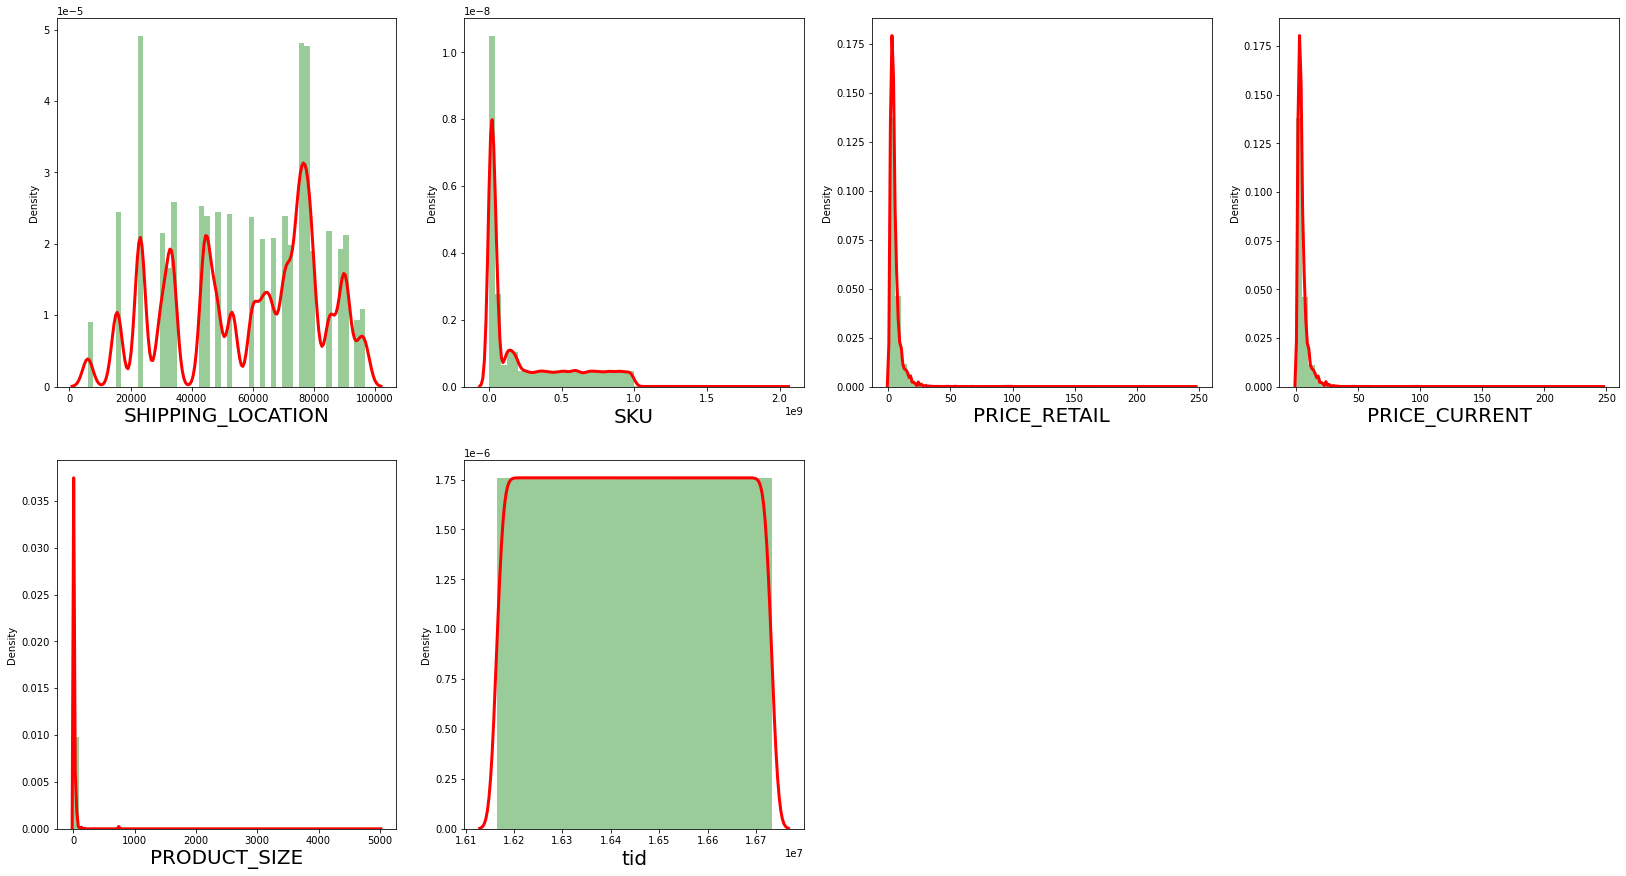

In [15]:
draw_dist(numeric_columns)

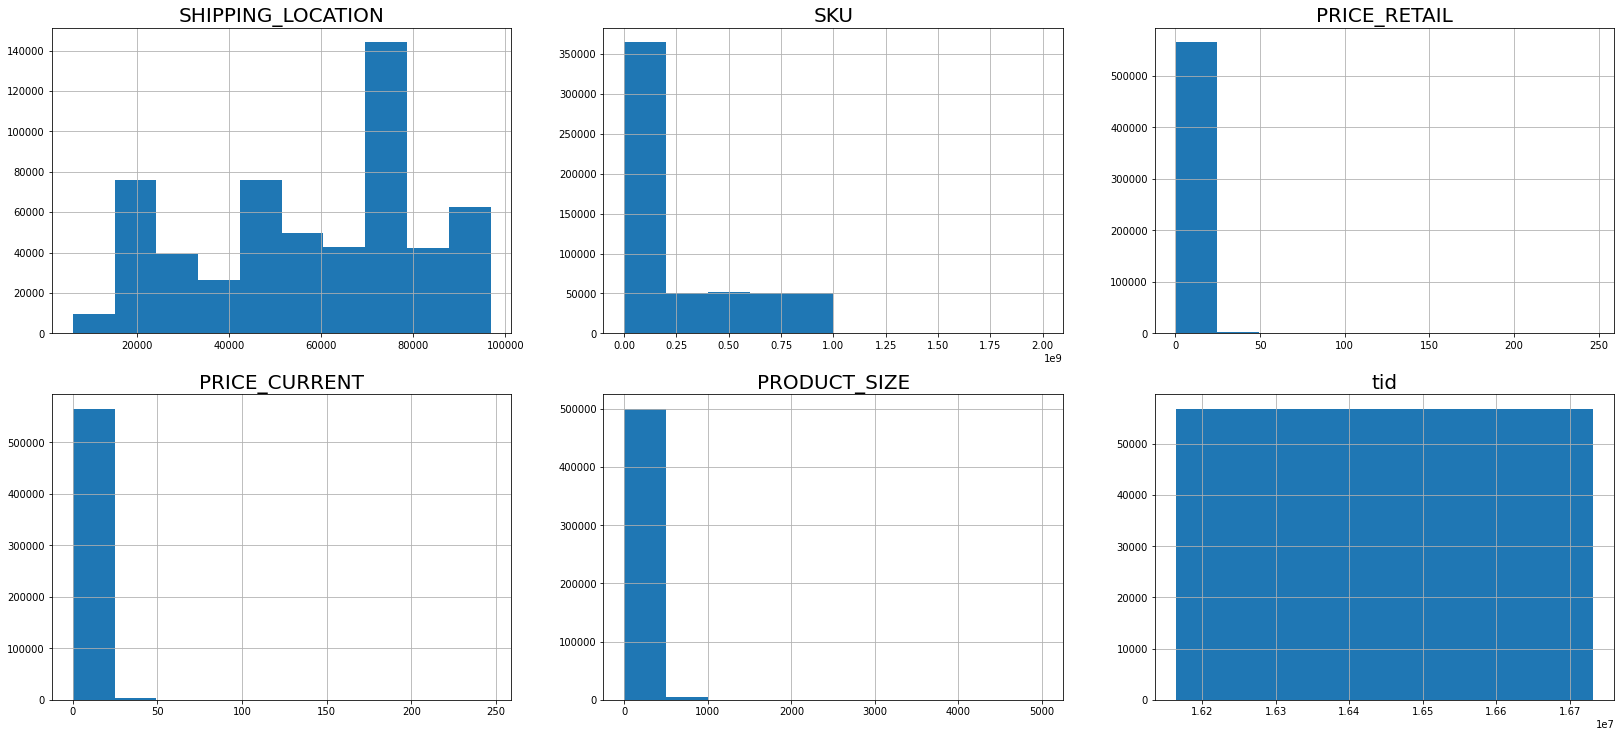

In [16]:
 
draw_hist(numeric_columns)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

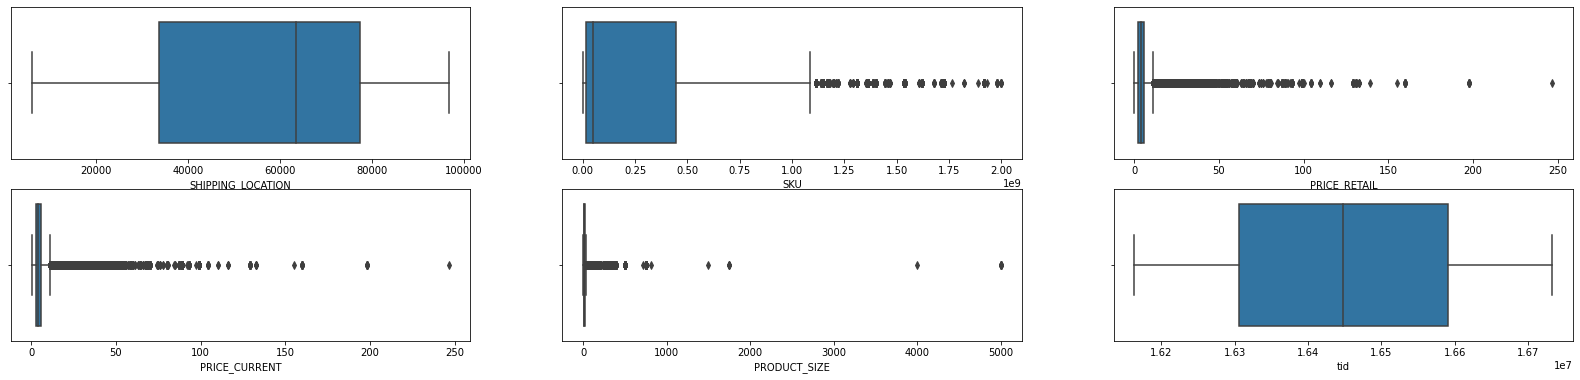

In [17]:
draw_boxplot(numeric_columns)

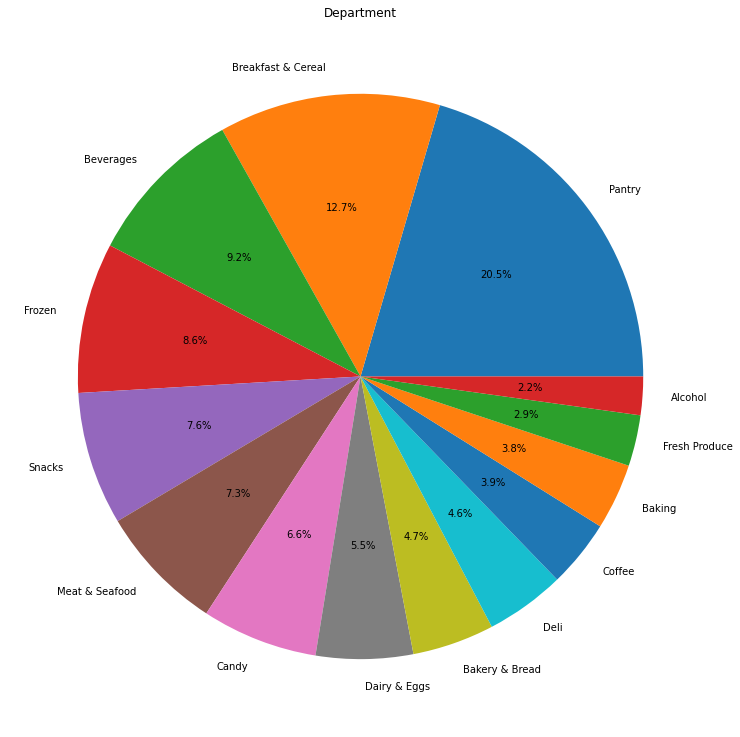

In [18]:
values=df.DEPARTMENT.value_counts() 
total=values.sum()
values=(values*100)/total
plt.rcParams['figure.figsize'] = (13,13)
values.plot.pie(  autopct = '%.1f%%')
plt.title("Department")
plt.axis('off')
plt.show() 



In [19]:
top_sellers = df.groupby('BRAND')['BRAND'].agg(['count']).sort_values('count', ascending=False) # count all brand names
top_sellers.head(20)

,count
BRAND,
Great Value,80387
Freshness Guaranteed,17815
Marketside,15772
PRODUCE UNBRANDED,8643
Kraft,4561
Starbucks,4441
Hershey's,4302
Hormel,3879
Pillsbury,3784


In [20]:
df.groupby("DEPARTMENT")["SUBCATEGORY"].nunique()  # unique SUBCATEGORY of departments

DEPARTMENT
Alcohol               17
Bakery & Bread        41
Baking                 0
Beverages             15
Breakfast & Cereal    23
Candy                  0
Coffee                 7
Dairy & Eggs           0
Deli                   0
Fresh Produce          1
Frozen                 1
Meat & Seafood        22
Pantry                 4
Snacks                 0
Name: SUBCATEGORY, dtype: int64

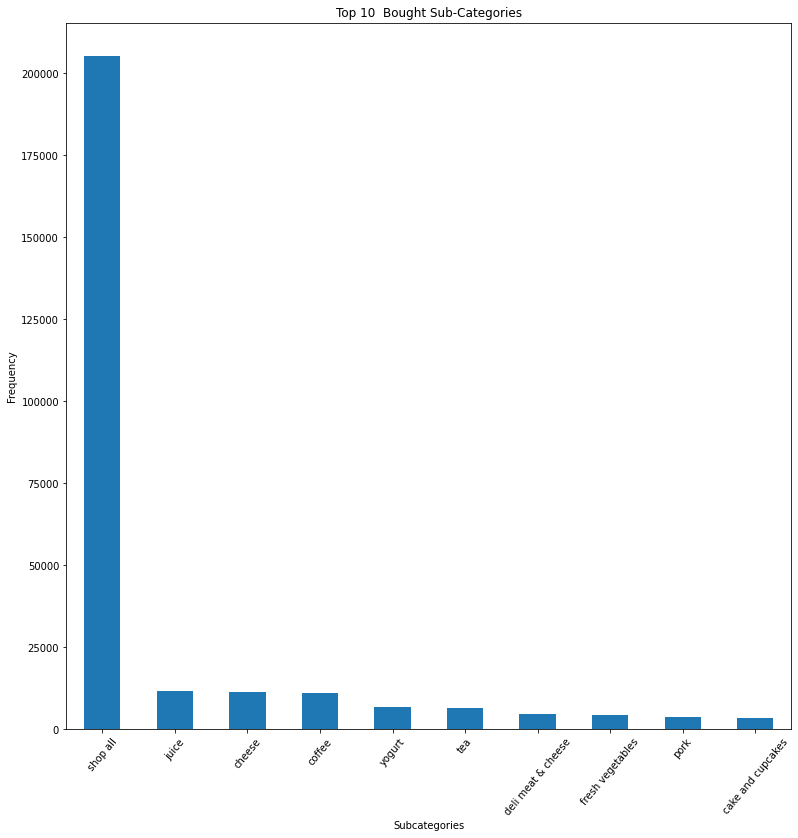

In [21]:
# plt.rcParams['figure.figsize'] = (13,10)
df.SUBCATEGORY.value_counts().head(10).sort_values( ascending = False ).plot(kind='bar'  )
plt.title("Top 10  Bought Sub-Categories")
sns.set_context("poster")
plt.xticks(rotation =50)
plt.xlabel("Subcategories")
plt.ylabel("Frequency") 
plt.show()

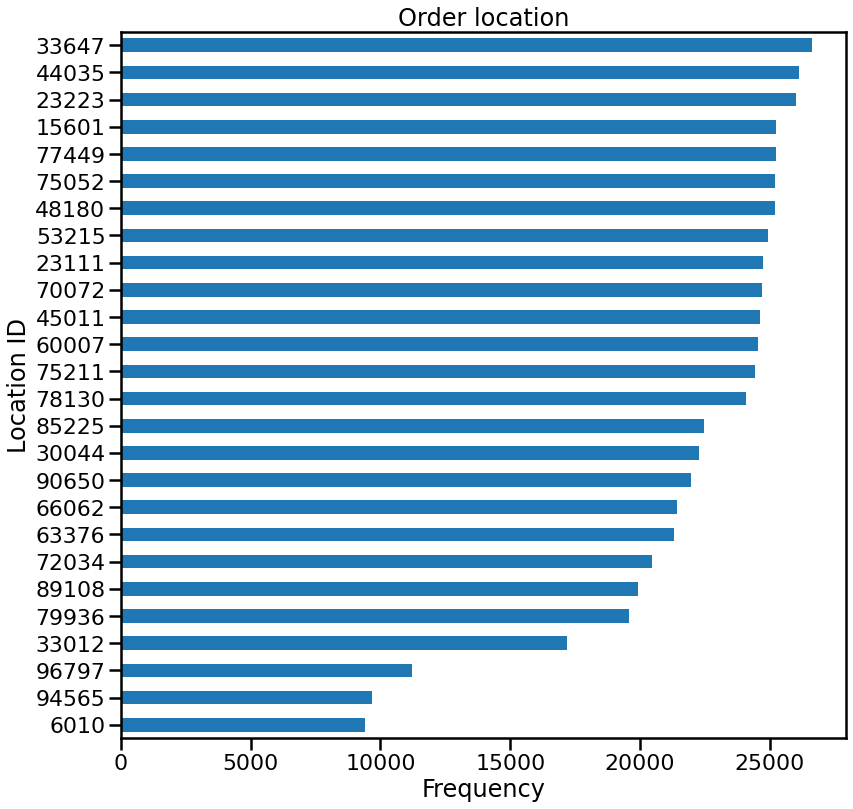

In [22]:
df.SHIPPING_LOCATION.value_counts().sort_values().plot(kind='barh' )
plt.title("Order location")
plt.ylabel("Location ID")
plt.xlabel("Frequency") 
plt.show()

<AxesSubplot:>

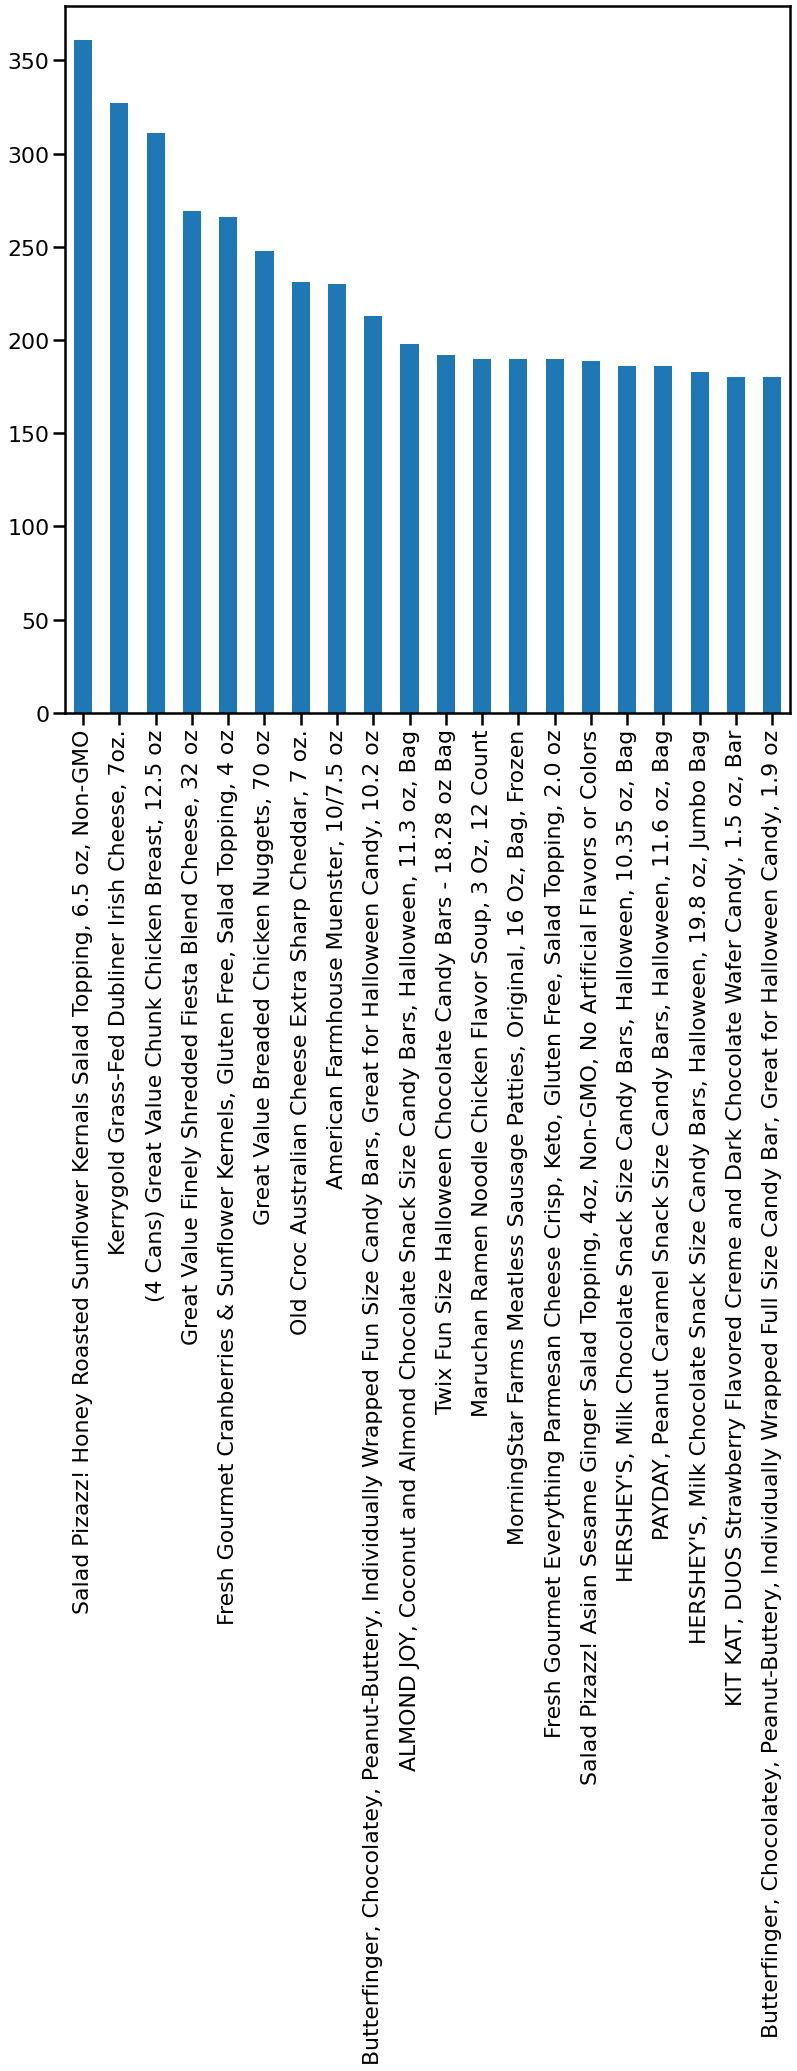

In [23]:
df.PRODUCT_NAME.value_counts().head(20).plot.bar()

In [24]:
df.drop("tid",axis=1,inplace=True) 

In [25]:
df["RunDate"]=pd.to_datetime(df["RunDate"]) # from object to date time
df["day"] = df["RunDate"].map(lambda x: x.day) # extract day
df["month"] =df["RunDate"].map(lambda x: x.month) # extract month
df["year"] = df["RunDate"].map(lambda x: x.year) # extract year
df["Date"]=df["RunDate"].dt.date # Get day
df.drop(  "RunDate" ,axis=1,inplace=True)
df.head(5)

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,SKU,PRODUCT_URL,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,day,month,year,Date
0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",110895339,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,2.67,2.67,10.0,11,9,2022,2022-09-11
1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",105455228,https://www.walmart.com/ip/Marketside-Roasted-...,"Marketside Roasted Garlic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,11,9,2022,2022-09-11
2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",128642379,https://www.walmart.com/ip/Marketside-Classic-...,"Marketside Classic Hummus, 10 Oz",Marketside,2.67,2.67,10.0,11,9,2022,2022-09-11
3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",366126367,https://www.walmart.com/ip/Marketside-Everythi...,"Marketside Everything Hummus, 10 oz",Marketside,2.67,2.67,10.0,11,9,2022,2022-09-11
4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",160090316,https://www.walmart.com/ip/Price-s-Jalapeno-Di...,"Price's Jalapeno Dip, 12 Oz.",Price's,3.12,3.12,12.0,11,9,2022,2022-09-11


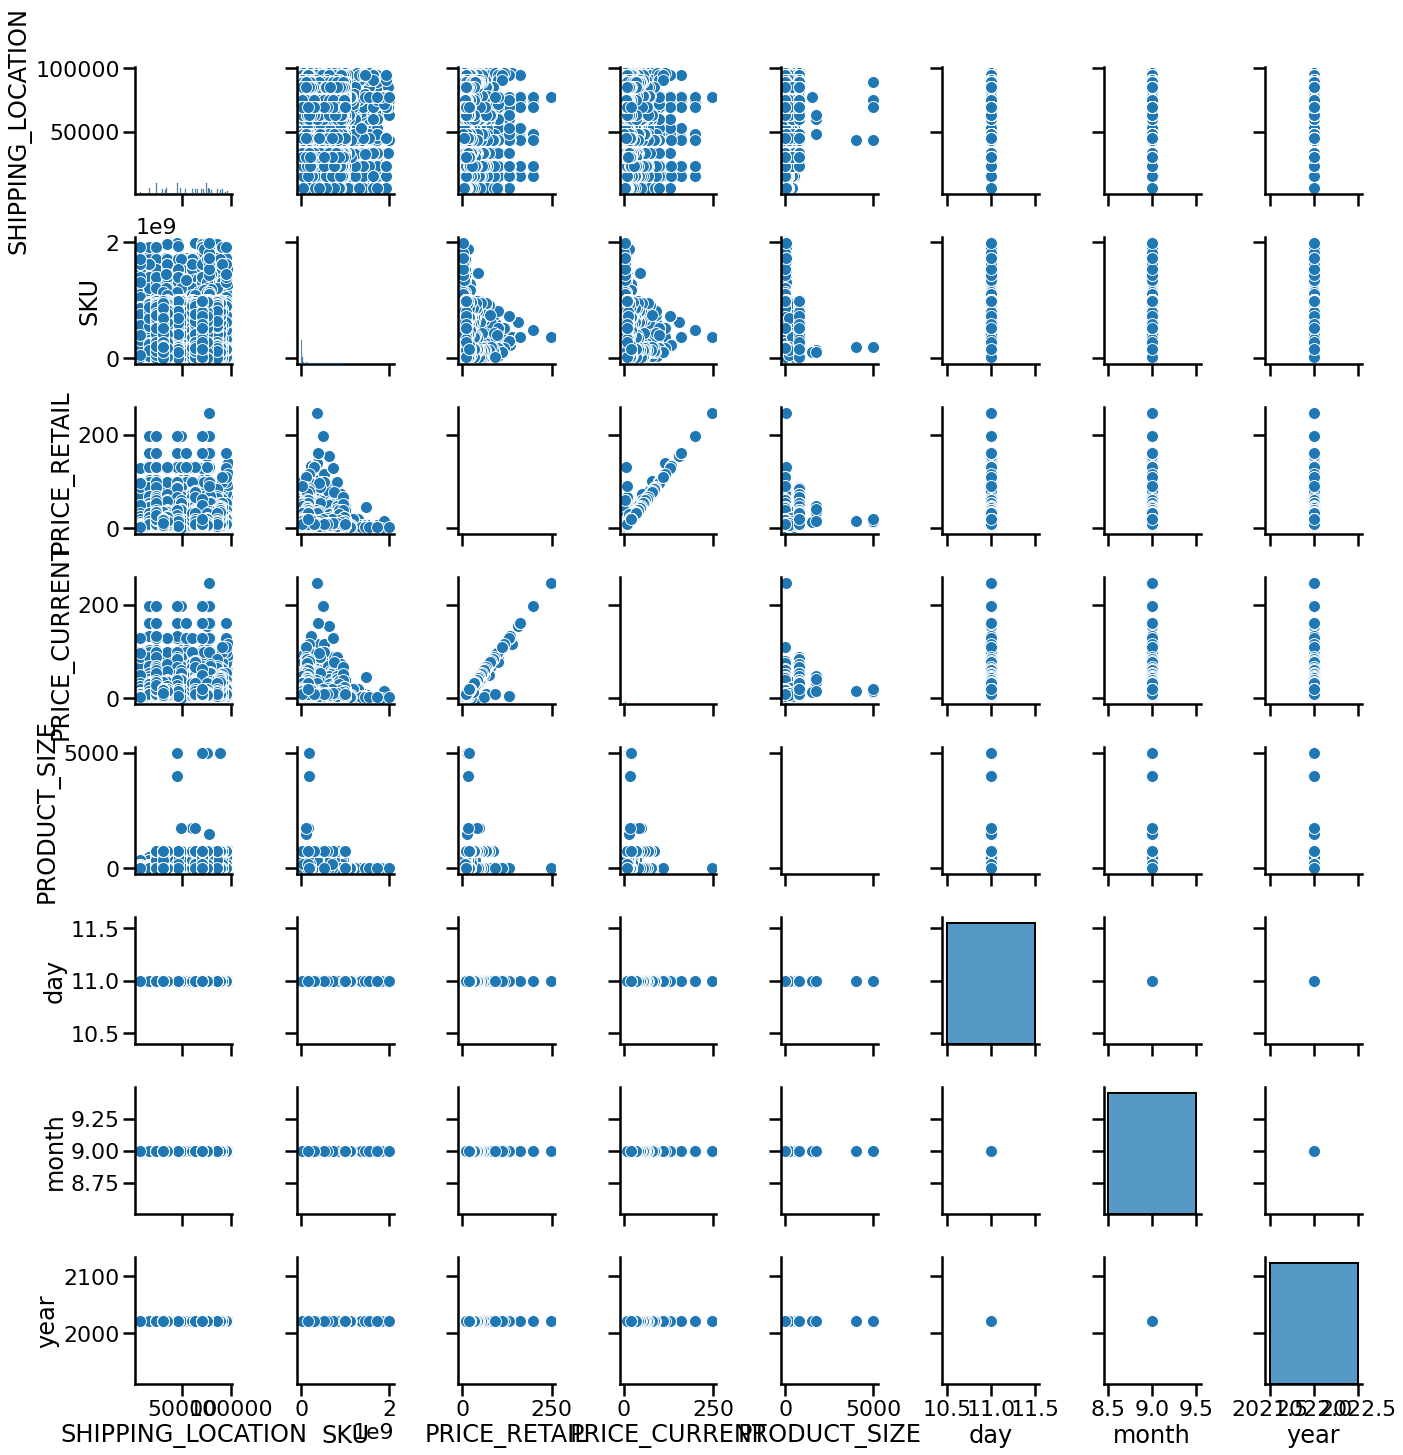

In [26]:
sns.pairplot(df)
plt.show() 

In [27]:
top_sellers = df.groupby(['SUBCATEGORY','CATEGORY']).size() 
top_sellers

SUBCATEGORY                      CATEGORY           
arizona                          Tea                     243
artisan breads                   Fresh Bakery Breads     399
bacon                            Breakfast Meats        1167
bagels                           Breakfast Breads       1372
baguettes, loaves & breadsticks  Fresh Bakery Breads     533
                                                        ... 
white bread                      Sliced Bread            940
white wine                       Wine                   2207
whole wheat bread                Sliced Bread            564
yogi                             Tea                     413
yogurt                           Dairy & Eggs           6928
Length: 154, dtype: int64

In [28]:
df.corr() # NAN shows no correlation

,SHIPPING_LOCATION,SKU,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,day,month,year
SHIPPING_LOCATION,1.000000,-0.017213,0.008484,0.008678,0.017449,NaN,NaN,NaN
SKU,-0.017213,1.000000,0.106364,0.107680,-0.007720,NaN,NaN,NaN
PRICE_RETAIL,0.008484,0.106364,1.000000,0.990034,0.252070,NaN,NaN,NaN
PRICE_CURRENT,0.008678,0.107680,0.990034,1.000000,0.256880,NaN,NaN,NaN
PRODUCT_SIZE,0.017449,-0.007720,0.252070,0.256880,1.000000,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


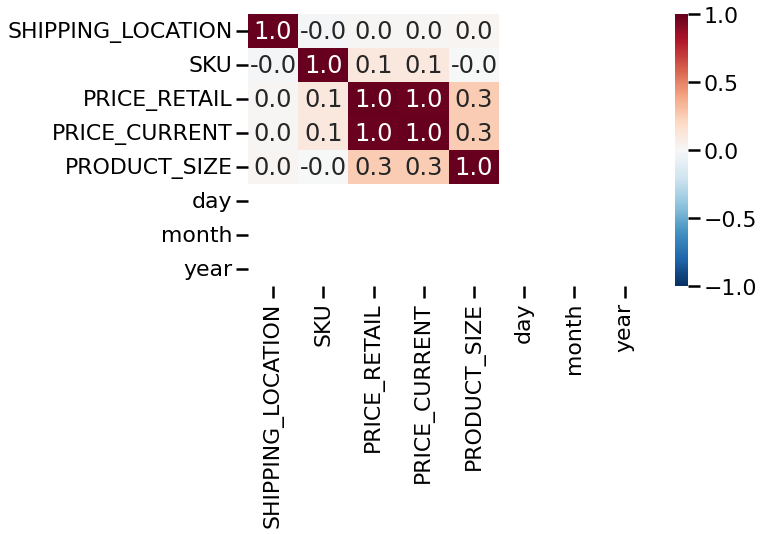

In [29]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(), cmap='RdBu_r', annot=True, vmax=1, vmin=-1,fmt='.1f')
plt.show()

In [30]:
#Correlation with output variable
correlation=df.corr()
cor_target = abs(correlation["PRICE_CURRENT"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target < 1]
relevant_features.sort_values(ascending=False) 
 

PRICE_RETAIL         0.990034
PRODUCT_SIZE         0.256880
SKU                  0.107680
SHIPPING_LOCATION    0.008678
Name: PRICE_CURRENT, dtype: float64

In [31]:
df.drop(  "SKU" ,axis=1,inplace=True) # as sku is least correlated to current price

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

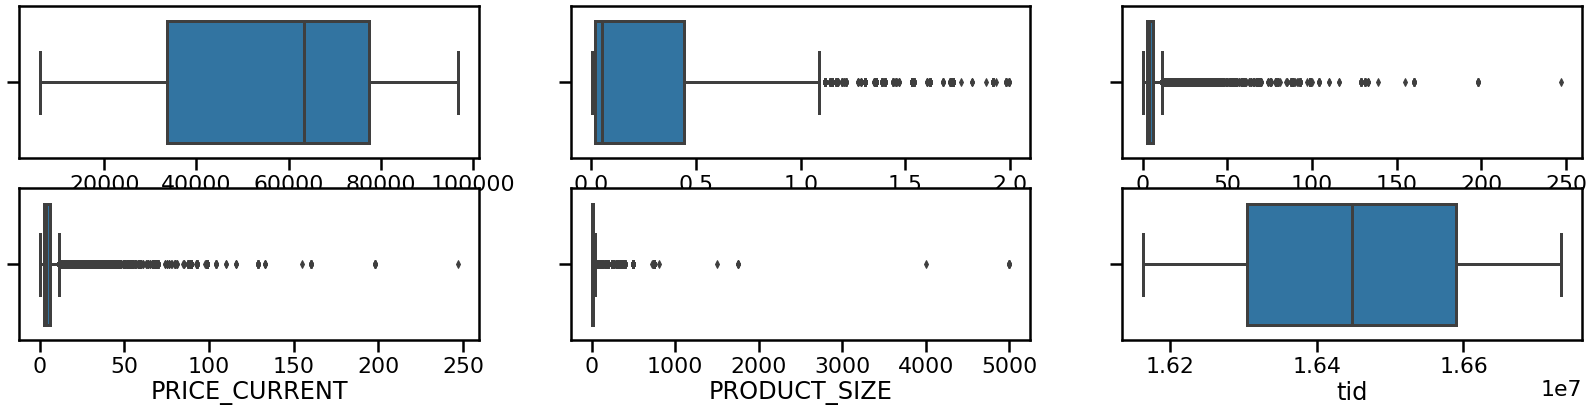

In [32]:
draw_boxplot(numeric_columns)

# Data Transformation

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_RETAIL', ylabel='Density'>

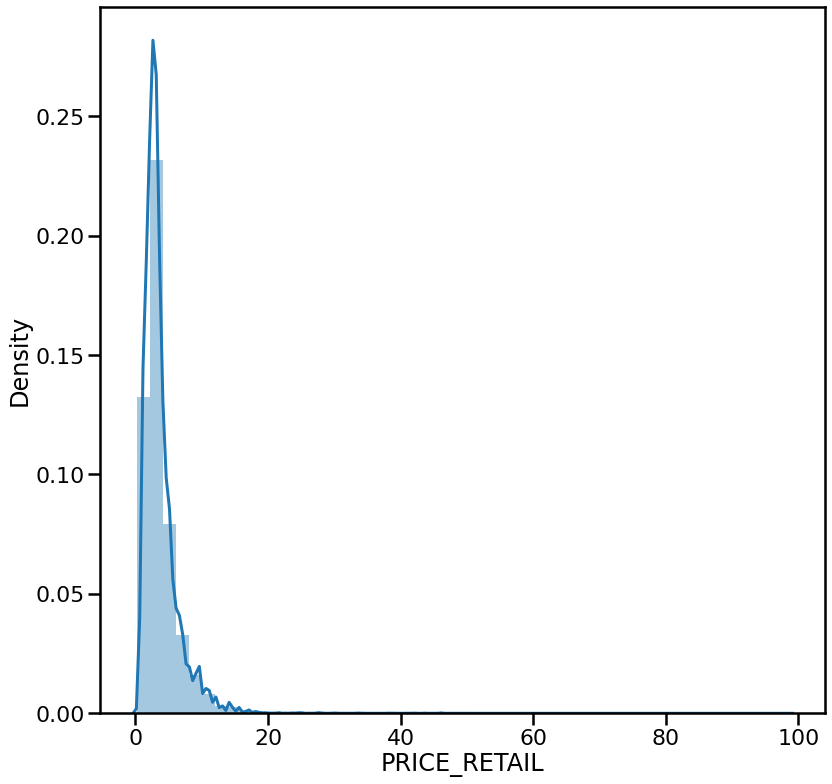

In [33]:
a= pow((df.PRICE_RETAIL  ), 1/1.2) # price retail is not normally distributed
sns.distplot(a)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_RETAIL', ylabel='Density'>

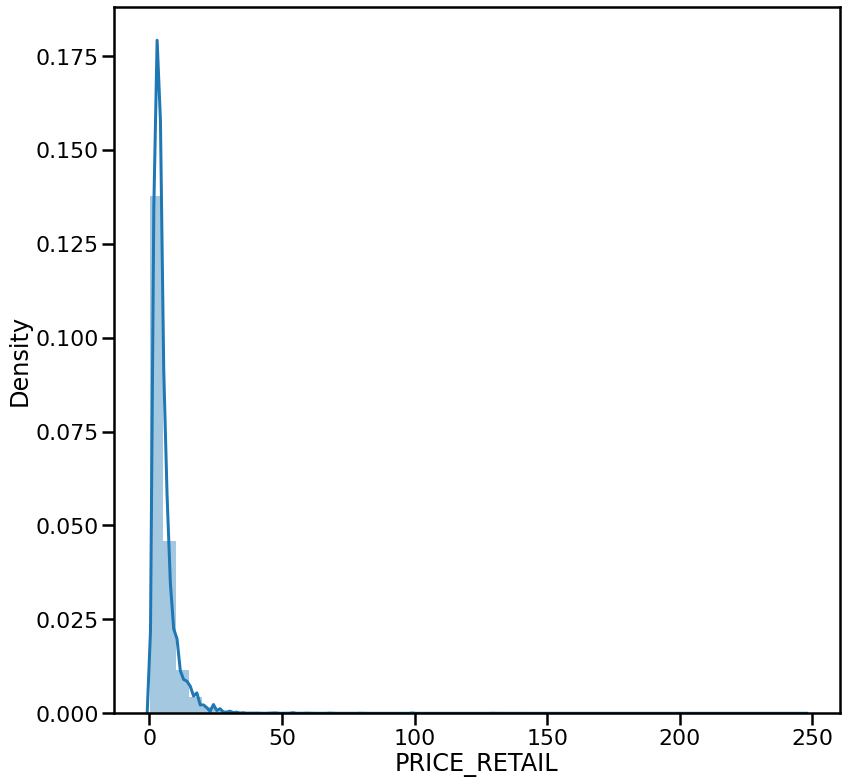

In [34]:
a=  ((df.PRICE_RETAIL  ) ) # # price retail is not normally distributed
sns.distplot(a)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRICE_RETAIL', ylabel='Density'>

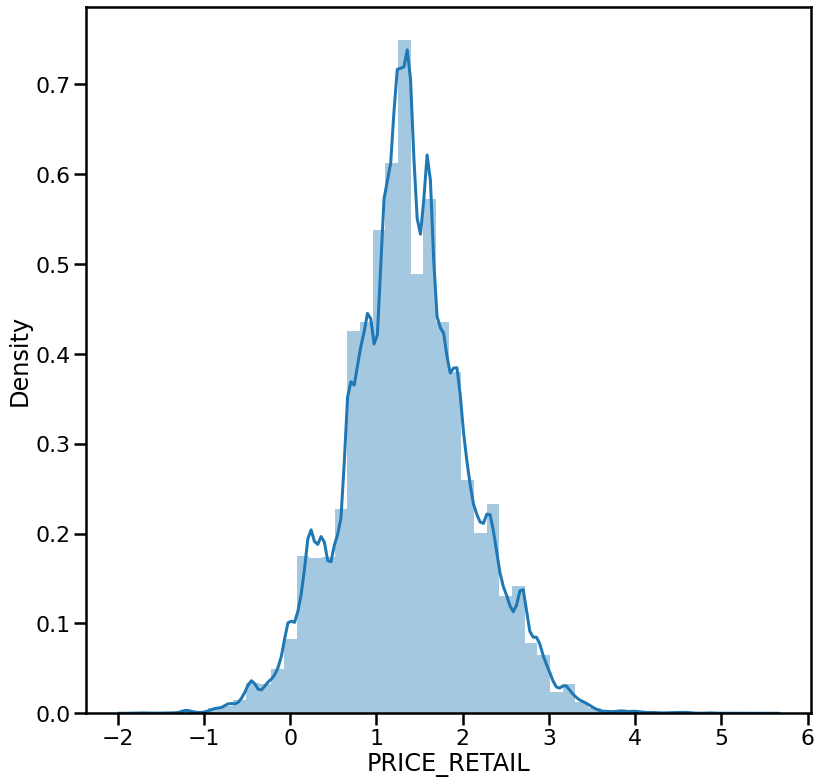

In [35]:
df.PRICE_RETAIL=   np.log((df.PRICE_RETAIL  )  ) # price retail is   normally distributed  using log on it
sns.distplot(df.PRICE_RETAIL)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRODUCT_SIZE', ylabel='Density'>

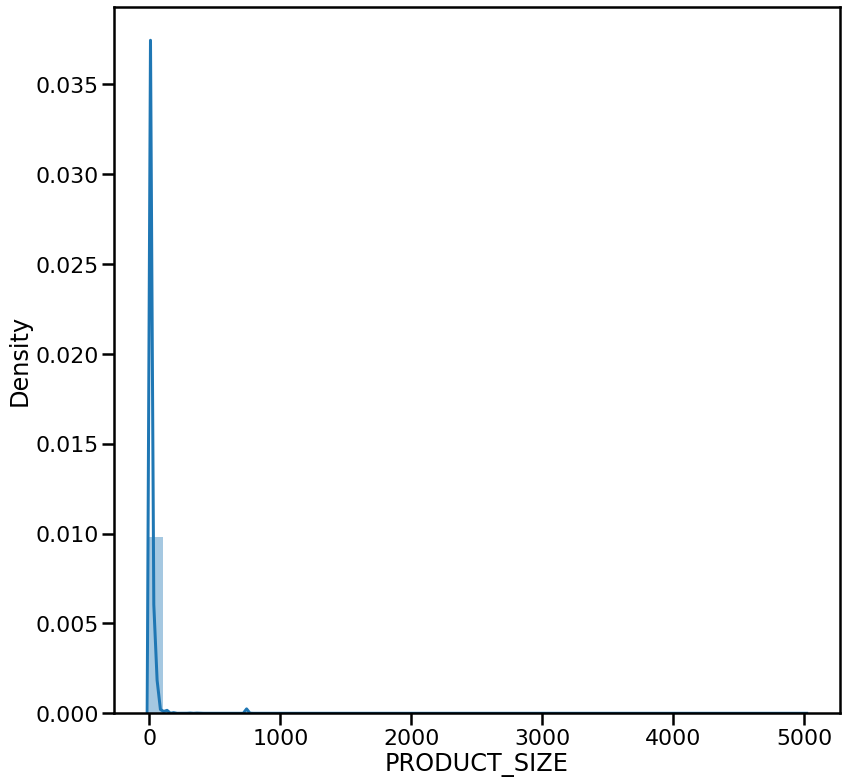

In [36]:
a=  ((df.PRODUCT_SIZE  ) ) #price retail is  not normally distributed 
sns.distplot(a)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRODUCT_SIZE', ylabel='Density'>

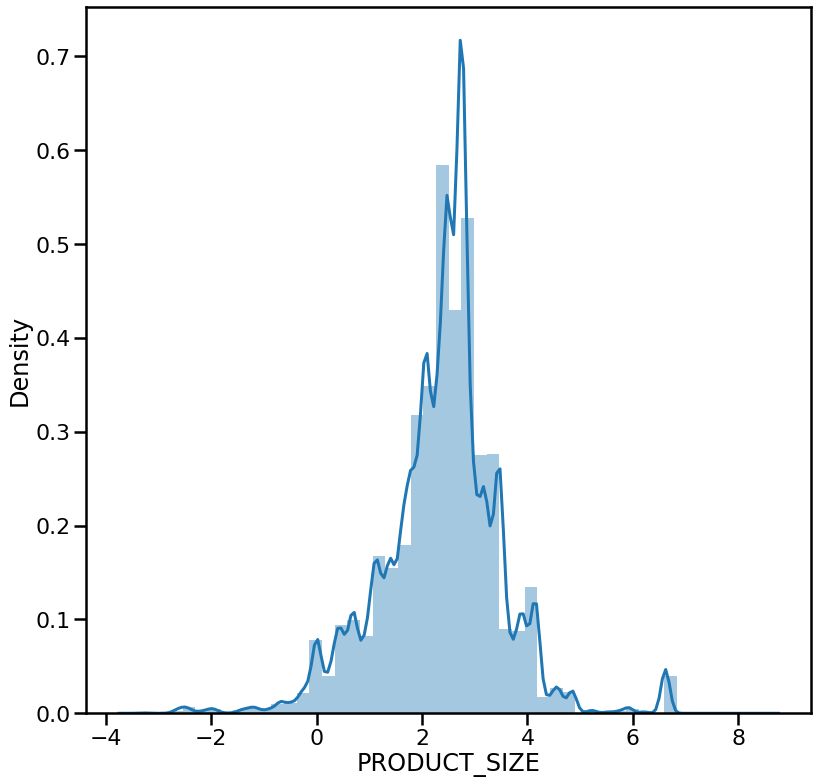

In [37]:
df.PRODUCT_SIZE=  np.log((df.PRODUCT_SIZE  ) )# PRODUCT_SIZE is   normally distributed  using log on it
sns.distplot(df.PRODUCT_SIZE)

In [38]:
y=df['PRICE_CURRENT']

In [39]:
# df.drop('PRICE_CURRENT',inplace=True,axis=1)
df.drop('PRODUCT_URL',inplace=True,axis=1) # droping URL as it will redirect to product on product_name feature

# feature engineering

In [40]:
null_values(df)

SHIPPING_LOCATION         0
DEPARTMENT                0
CATEGORY                  0
SUBCATEGORY          207210
BREADCRUMBS               0
PRODUCT_NAME              0
BRAND                    27
PRICE_RETAIL              0
PRICE_CURRENT             0
PRODUCT_SIZE          63560
day                       0
month                     0
year                      0
Date                      0
dtype: int64
Columns containing Null Values are :  ['SUBCATEGORY', 'BRAND', 'PRODUCT_SIZE']


Feature Engineer

In [41]:
columns_DEPARTMENT=df.DEPARTMENT.value_counts().head(10).index  # top 10  categories of DEPARTMENT
columns_DEPARTMENT=list(columns_DEPARTMENT)
columns_DEPARTMENT

['Pantry',
 'Breakfast & Cereal',
 'Beverages',
 'Frozen',
 'Snacks',
 'Meat & Seafood',
 'Candy',
 'Dairy & Eggs',
 'Bakery & Bread',
 'Deli']

In [42]:
df=  df[df["DEPARTMENT"].isin( columns_DEPARTMENT)] # reatain top 10 only in DEPARTMENT
df

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,day,month,year,Date
0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Roasted Red Pepper Hummus, 10 Oz",Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Roasted Garlic Hummus, 10 Oz",Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Classic Hummus, 10 Oz",Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Marketside Everything Hummus, 10 oz",Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa","Price's Jalapeno Dip, 12 Oz.",Price's,1.137833,3.12,2.484907,11,9,2022,2022-09-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556416,77449,Snacks,Healthy Snacks,NaN,Snacks/Healthy Snacks,"Wonderful Pistachios Roasted & Salted, 8 Oz",Wonderful,1.439835,4.22,2.079442,11,9,2022,2022-09-11
556417,77449,Snacks,Healthy Snacks,NaN,Snacks/Healthy Snacks,Great Value Roasted & Lightly Salted Mixed Nut...,Great Value,1.701105,5.48,2.691243,11,9,2022,2022-09-11
556418,77449,Snacks,Healthy Snacks,NaN,Snacks/Healthy Snacks,"Planters Roasted Pecans, 7.25 oz Canister",Planters,1.884035,6.58,1.981001,11,9,2022,2022-09-11
556419,77449,Snacks,Healthy Snacks,NaN,Snacks/Healthy Snacks,"Wonderful Pistachios, Lightly Salted, 16 Oz",Wonderful Pistachios,2.079442,8.00,2.772589,11,9,2022,2022-09-11


In [43]:
# df1=df.copy()
columns_DEPARTMENT=df.CATEGORY.value_counts().head(70).index # top 70 in CATEGORY
columns_DEPARTMENT=list(columns_DEPARTMENT)
columns_DEPARTMENT

['Fresh Food',
 'Breakfast Beverages',
 'Condiments',
 'Dairy & Eggs',
 'Canned goods',
 'Herbs, spices & seasonings',
 'Chocolate',
 'Frozen Meals & Snacks',
 'International foods',
 'Chips',
 'Juices',
 'Cheese',
 'Healthy Snacks',
 'Pasta & pizza',
 'Soup',
 'Frozen Desserts',
 'Packaged meals & side dishes',
 'Frozen Meat & Seafood',
 'Breakfast Breads',
 'Great Value Beverages',
 'Frozen Breakfast',
 'Frozen Pizza, Pasta, & Breads',
 'Yogurt',
 'Drink Mixes',
 'Tea',
 'Gummy & chewy candy',
 'Bacon, Hot Dogs, Sausage',
 'Crackers',
 'Cooking oils & vinegars',
 'Deli Meat & Cheese',
 'Sweet Treats',
 'Rolls & Buns',
 'Snacks & Fresh Sandwiches',
 'Frozen Produce',
 'Cakes & Cupcakes',
 'Milk',
 'Granola Bars',
 'Rice, grains & dried beans',
 'Halloween candy',
 'Energy Drinks',
 'Grilling',
 'Orange Juice & Chilled',
 'Canned vegetables',
 'Multipacks & bags',
 'Sports Drinks',
 'Prepared Meals & Sides',
 'Popcorn',
 'Muffins & Pastries',
 'Cream & Creamers',
 'Gum',
 'Sliced Bread

In [44]:
df=  df[df["CATEGORY"].isin( columns_DEPARTMENT)]   # reatain top 70 only in CATEGORY
# df=df.copy()

In [45]:
columns_DEPARTMENT=df.BREADCRUMBS.value_counts().head(70).index  # top 70  BREADCRUMBS
columns_DEPARTMENT=list(columns_DEPARTMENT)
df=  df[df["BREADCRUMBS"].isin( columns_DEPARTMENT)] # retain only top 70
# df=df1.copy()
# df

In [46]:
# df1=df.copy()
columns_DEPARTMENT=df.BRAND.value_counts().head(2000).index # top 2000 brands
columns_DEPARTMENT=list(columns_DEPARTMENT)
df=  df[df["BRAND"].isin( columns_DEPARTMENT)]
 
# df=df1.copy() 
# df
 

In [47]:
df.isnull().sum()

SHIPPING_LOCATION         0
DEPARTMENT                0
CATEGORY                  0
SUBCATEGORY          170891
BREADCRUMBS               0
PRODUCT_NAME              0
BRAND                     0
PRICE_RETAIL              0
PRICE_CURRENT             0
PRODUCT_SIZE          49744
day                       0
month                     0
year                      0
Date                      0
dtype: int64

In [48]:
  
df['PRODUCT_NAME'] = df['PRODUCT_NAME'].str.split(',').str[0]  # sepate product name and product size as product size  already in produdt size  
 
df.head()
 

,SHIPPING_LOCATION,DEPARTMENT,CATEGORY,SUBCATEGORY,BREADCRUMBS,PRODUCT_NAME,BRAND,PRICE_RETAIL,PRICE_CURRENT,PRODUCT_SIZE,day,month,year,Date
0,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",Marketside Roasted Red Pepper Hummus,Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
1,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",Marketside Roasted Garlic Hummus,Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
2,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",Marketside Classic Hummus,Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
3,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",Marketside Everything Hummus,Marketside,0.982078,2.67,2.302585,11,9,2022,2022-09-11
4,79936,Deli,"Hummus, Dips, & Salsa",NaN,"Deli/Hummus, Dips, & Salsa",Price's Jalapeno Dip,Price's,1.137833,3.12,2.484907,11,9,2022,2022-09-11


In [49]:
# fill null values
df["PRODUCT_SIZE"]=df["PRODUCT_SIZE"].fillna(df["PRODUCT_SIZE"].mean())
df["SUBCATEGORY"]=df["SUBCATEGORY"].fillna(df["SUBCATEGORY"].mode().iloc[0])

In [50]:
null_values(df) 

SHIPPING_LOCATION    0
DEPARTMENT           0
CATEGORY             0
SUBCATEGORY          0
BREADCRUMBS          0
PRODUCT_NAME         0
BRAND                0
PRICE_RETAIL         0
PRICE_CURRENT        0
PRODUCT_SIZE         0
day                  0
month                0
year                 0
Date                 0
dtype: int64
Columns containing Null Values are :  []


In [51]:
# df1=df.copy()
columns_DEPARTMENT=df.SUBCATEGORY.value_counts().head(60).index # top 60 features
columns_DEPARTMENT=list(columns_DEPARTMENT)
df=  df[df["SUBCATEGORY"].isin( columns_DEPARTMENT)]
 

In [52]:
df.drop(['day','year','month','Date'],axis=1,inplace=True) # as no correlated to current price so drop it

In [53]:
# df1=df.copy()
columns_DEPARTMENT=df.PRODUCT_NAME.value_counts().head(14000).index
columns_DEPARTMENT=list(columns_DEPARTMENT)
df=  df[df["PRODUCT_NAME"].isin( columns_DEPARTMENT)]
# df1
# df=df1.copy() 
# df
 

In [54]:
enc = OrdinalEncoder()

In [55]:
# encode all CATEGORical features
df[["DEPARTMENT","CATEGORY", "SUBCATEGORY","BREADCRUMBS","PRODUCT_NAME", "BRAND"]] = enc.fit_transform(df[["DEPARTMENT","CATEGORY", "SUBCATEGORY","BREADCRUMBS","PRODUCT_NAME", "BRAND"]])

# Ml model

In [56]:
y=df[["PRICE_CURRENT"]]
x=df.drop("PRICE_CURRENT",axis=1)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import  RandomForestRegressor

In [59]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [60]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 Score",r2)

MSE 3.8733297734115455
MAE 1.1556481773565348
R2 Score 0.7451419967793593


In [61]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [62]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print("R2 Score",r2)

MSE 0.007172832289304745
MAE 0.002409002769809072
R2 Score 0.9995280407758623
